## Boosting techniques to solve classification problems  

`MNIST multiclass digit recognition dataset`  
[video link](https://youtu.be/DhftGTaoFDI)  

**Import basic libraries**  

In [1]:
# plotting utility
import matplotlib.pyplot as plt

# dataset loading through mnist
from keras.datasets import mnist

# training three classifiers:
# AdaBoostClassifier, GradientBoostingClassifier and XGBoostClassifier.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# model selection utilities for training and test split and cross validation  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# use shuffle-split cross validation for this exercise
from sklearn.model_selection import ShuffleSplit

# make use of confusion matrix and classification report to evaluate performance on test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# the model is defined through pipeline utility
from sklearn.pipeline import Pipeline

## Loading MNIST dataset  

In [2]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

There are 60000 examples in training set and 10000 examples in the test set.  

Each example is a grey scale image of size 28*28. There are 10 different labels - one for each digit - 0 to 9.  

In [3]:
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing data: {X_test.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing data: (10000, 28, 28)
Shape of testing labels: (10000,)


Before using the dataset for training and evaluation, we need to flatten it into a vector. After flattening, we have training and test examples represented with a vector of 784 features. Each feature records pixel intensity in each of 28*28 pixel.  

We normalize the pixel intensity by dividing it with the maximum value i.e., 255. In that sense, we have each feature value in the range 0 to 1.  

In [5]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing
X_train = X_train/255
X_test = X_test/255

In [6]:
print(f"Shape of training data after flattening: {X_train.shape}")
print(f"Shape of testing data after flattening: {X_test.shape}")

Shape of training data after flattening: (60000, 784)
Shape of testing data after flattening: (10000, 784)


We use `ShuffleSplit` cross validation with 10 splits and 20% data set aside for model evaluation as a test data.  

In [7]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

We define two functions to facilitate training and evaluation of different classifiers:  
1. `train_classifiers`  
2. `eval`  

In [8]:
def train_classifiers(estimator, X_train, y_train, cv, name):
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(estimator, X_train, y_train,
                                        cv=cv, scoring='f1_macro')
    print(f"On an average, {name} model has f1 score of "
            f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.")

In [9]:
def eval(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)

    print(f"# Classification report")
    print(classification_report(y_test, y_pred))

    print(f"# Confusion matrix")
    disp = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.title('Confusion matrix')
    plt.show()

Let's train two classifiers with default parameters.  
* `AdaBoostClassifier` that uses decision stumps as weak learners.  
* `GradientBoostingClassifier` that uses decision trees as weak learners.  

## AdaBoost for MNIST multiclass classification  

We instantiate a decision tree classifier with default parameters and train it. The `train_classifier` function prints mean of cross validated accuracy and standard deviation of the trained classifier on the training set.  

In [10]:
abc_pipeline = Pipeline([('classifier', AdaBoostClassifier())])
train_classifiers(abc_pipeline, X_train, y_train.ravel(),
                    cv, 'AdaBoostClassifier')

On an average, AdaBoostClassifier model has f1 score of 0.712 +/- 0.016 on the training set.


Let's evaluate the trained classifier on the test set.  

# Classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       980
           1       0.85      0.94      0.90      1135
           2       0.79      0.58      0.67      1032
           3       0.68      0.67      0.68      1010
           4       0.72      0.72      0.72       982
           5       0.69      0.59      0.64       892
           6       0.72      0.86      0.78       958
           7       0.68      0.78      0.73      1028
           8       0.66      0.68      0.67       974
           9       0.62      0.55      0.58      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.73     10000

# Confusion matrix


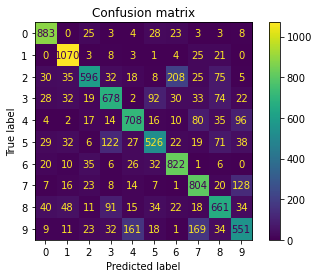

In [11]:
eval(abc_pipeline, X_test, y_test)

## MNIST classification with GradientBoostingClassifier  

Let's instantiate a gradient boosting classifier object with default parameters and train it.  
Observe the mean `f1_score` and its standard deviation obtained by the classifier based on 10-fold cross validation of the training set.  

In [13]:
gbc_pipeline = Pipeline([('classifier', GradientBoostingClassifier(n_estimators=10))])
train_classifiers(gbc_pipeline, X_train, y_train.ravel(),
                    cv, 'GradientBoostingClassifier')

Let's evaluate the trained classifier on the test set.  

In [ ]:
eval(gbc_pipeline, X_test, y_test)

## MNIST classification with XGBoost classifier  

In [ ]:
from xgboost import XGBClassifier

In [ ]:
?XGBClassifier

In [ ]:
xbc_pipeline = Pipeline([('classifier', XGBClassifier())])
train_classifiers(xbc_pipeline, X_train, y_train.ravel(),
                    cv, 'XGBClassifier')

In [ ]:
eval(xbc_pipeline, X_test, y_test)